# Lab 4: Maximum Likelihood Estimate (MLE)

### Introduction

In this lab session we shall have a look at how to use the *Maximum Likelihood Estimate (MLE)* method to estimate the parameters of some model, given some observations $D$.

<font color="red">NOTE: </font>In the notation $\mathcal{N} (\mu, \sigma^2)$ $\mu$ refers to the mean and $\sigma^2$  the variance, not the standard deviation. The standard deviation is $\sigma = \sqrt {\sigma^2}$, i.e. for $\mathcal{N}(0.5, 0.25)$, the standard deviation is $\sigma = 0.5$.

As usual, let's import the libraries before we start by running the cell below.

In [1]:
from __future__ import print_function # to avoid issues between Python 2 and 3 printing

import numpy as np
from scipy import stats
# Necessary to import Axes3D to use `plt.subplots(subplot_kw={'projection': '3d'})`
# as this internally sets up matplotlib for 3D projection, without this import you'll 
# get an error.
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# show matplotlib figures inline
%matplotlib inline

In [2]:
# By default we set figures to be 7"x4" on a 110 dots per inch (DPI) screen 
# (adjust DPI if you have a high res screen!)
plt.rc('figure', figsize=(7, 4), dpi=110)
plt.rc('font', size=10)

## 1. MLE recipe

Let's suppose you're given $n$ one dimensional data points $D = \{d_0, d_1, ...,  d_{n-1} \}$ which you believe follow a normal distribution. In this case, your model has two parameters: $\mu$ and $\sigma^2$.

Given your data $D$, you wish to find the most likely parameters of the normal distribution.
Let's assume the standard deviation ($\sigma$) is 0.5, now estimate the parameter $\mu$ of the model (the mean of the normal distribution representing your data). 

Use the Maximum Likelihood Estimate (MLE) formula to show that $\mu_{ML} = \frac{1}{n}\sum_i d_i$.

**Hint**: assuming the data points are independent, we have 

$$p(D|\mu) = \prod_i p(d_i | \mu) = \prod_i \mathcal{N}(d_i|\mu, \sigma^2)$$

Additionally, since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$.

**Note:** This should be done on paper (and ideally typed up in $\LaTeX$ in the cell below), not using Python.

### Answer

Write here your answer using latex notation. Alternatively, write your solution on paper and show it to a TA.

### CORRECT ANSWER ###
Our goal is to find the most likely $\mu$ given the data $D$, therefore we're looking to solve
$\arg\max_\mu p(D|\mu)$. Whenever you see an $\arg\max$ you should be thinking about find stationary points of the function using derivatives.

Since this is a convex function, we can analytically find the stationary point that maximises the function where $\frac{dp(D|\mu)}{d\mu} = 0$. 

We employ a trick in doing this by observing that $\frac{dp(D|\mu)}{d\mu} = 0 \Leftrightarrow \frac{d\ln p(D|\mu)}{d\mu} = 0$

Assuming $\sigma = 0.5$

\begin{equation}
\sigma = 0.5 \Leftrightarrow \sigma^2 = 0.25
\end{equation}

First we simplify the pdf:

\begin{align}
p(d|\mu) &= \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(d - \mu)^2}{2\sigma^2}} \\
         &= \frac{1}{\sqrt{0.5\pi}} e^{-\frac{(d - \mu)^2}{0.5}} = \frac{1}{\sqrt{0.5\pi}} e^{-2(d - \mu)^2}
\end{align}

Since we assume independence between the samples, we have

\begin{equation}
p(D|\mu) = \prod_i p(d_i|\mu)
\end{equation}

Using our trick we'll instead solve for $\ln p(D|\mu)$ (as this makes solving the derivative a lot easier)

\begin{equation}
\ln p(D|\mu) = \ln \prod_i p(d_i|\mu) = \sum_i \ln p(d_i|\mu)
\end{equation}

Subsituting in the simplified pdf

\begin{align}
\sum_i \ln p(d_i|\mu) &= \sum_i \ln \frac{1}{\sqrt{0.5\pi}} e^{-2(d_i - \mu)^2} \\
                        &= \sum_i \ln 1 - \ln (0.5\pi)^{-1/2} + \ln e^{-2(d_i - \mu)^2} \\
                        &= -\frac{n}{2}\ln 0.5\pi + \sum_i \ln e^{-2(d_i - \mu)^2} \\
                        &= -\frac{n}{2}\ln 0.5\pi - 2\sum_i (d_i - \mu)^2
\end{align}


Now we solve for the derivative:

\begin{align}
\frac{d\ln p(D|\mu)}{d\mu} &= \frac{d}{d\mu} \left(-\frac{n}{2}\ln 0.5\pi - 2\sum_i(d_i - \mu)^2 \right) \\
                           &= 4 \sum_i \left(d_i - \mu\right) \\
                           &= 4 \left( \sum_i d_i - n\mu \right)\\ 
\end{align}

Now we solve for $\mu$ when our derivative is 0

\begin{align}
\frac{d\ln p(D|\mu)}{d\mu} = 0 \Leftrightarrow 0 &= 4 \left(  \sum_i d_i - n \mu \right)\\
                                               \mu &= \frac{1}{n} \sum_i d_i
\end{align}

In this solution we made use of the following laws:

- $\ln(ab) = \ln(a) + \ln(b)$
- $\ln(e) = 1$
- $\ln(1) = 0$
- $\ln(a^b) = b\ln(a)$
- $\frac{d}{dx}ln(x) = \frac{1}{|x|}$
- $\sum_i c x_i = c \sum_i x_i$
- $\sum_i^N c = Nc$

## 2. MLE with Python

We know want you to write a simple program that calculates $\mu_{\text{ML}}$ using Python.

Let's now load the data from the file `data1.dat` and let's plot the histogram of the data.

In [3]:
# write your code here

(array([2., 1., 5., 9., 8., 8., 8., 4., 2., 3.]),
 array([-0.34415 , -0.144065,  0.05602 ,  0.256105,  0.45619 ,  0.656275,
         0.85636 ,  1.056445,  1.25653 ,  1.456615,  1.6567  ]),
 <a list of 10 Patch objects>)

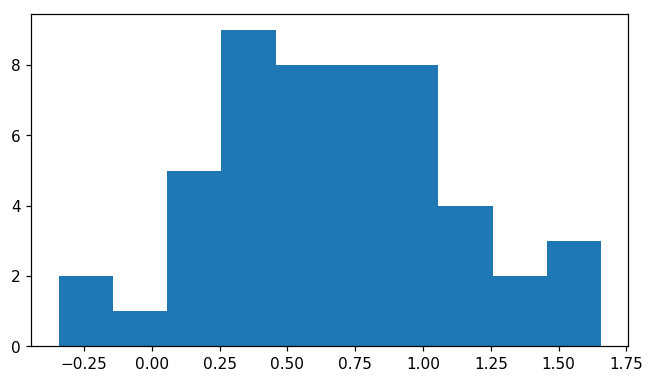

In [4]:
##CORRECT ANSWER##
D = np.loadtxt('data1.dat', delimiter=',')

plt.hist(D)
##CORRECT ANSWER##

You should now see a histogram approximating a normal distribution. In fact, `data1.data` contains the observations $D$ we talked about above when deriving $\mu_\text{ML}$, which we said we believe follows a normal distribution. 

Write a function `compute_likelihood(D, mu)` that takes a value of $\mu$ and computes $p(D | \mu)$ for the data in `data1.dat`, assuming $\sigma=0.5$.

You may use NumPy's function `np.prod` for the calculation.

In [5]:
# write your code here

In [6]:
##CORRECT ANSWER##
def compute_likelihood(data, mu, sigma=0.5):
    pdf = stats.norm.pdf(data, loc=mu, scale=sigma)
    likelihood = pdf.prod()
    
    return likelihood

compute_likelihood(D, 0.5)
##CORRECT ANSWER##

2.1613853049710207e-15

Write a function `loop_likelihood(D)` that calls `compute_likelihood` for each value of $\mu \in \{0.00, 0.01, 0.02, \ldots , 1.00\}$, storing *both* the value of $\mu$ and the corresponding obtained likelihood in a 2D array so that the first column contains the value $\mu$ and the second the likelihood $p(D|\mu)$ .

In [7]:
# write your code here

In [8]:
##CORRECT ANSWER##
def loop_likelihood(data, size=101):
    L = np.zeros(shape=(size, 2))
    
    for i, mu in enumerate(np.linspace(0, 1, size)):
        likelihood = compute_likelihood(data, mu)
        L[i, :] = (mu, likelihood)
        
    return L


loop_likelihood(D)
##CORRECT ANSWER##

array([[0.00000000e+00, 8.13741147e-34],
       [1.00000000e-02, 3.10295510e-33],
       [2.00000000e-02, 1.15978855e-32],
       [3.00000000e-02, 4.24909314e-32],
       [4.00000000e-02, 1.52590606e-31],
       [5.00000000e-02, 5.37122633e-31],
       [6.00000000e-02, 1.85324663e-30],
       [7.00000000e-02, 6.26768405e-30],
       [8.00000000e-02, 2.07775857e-29],
       [9.00000000e-02, 6.75145193e-29],
       [1.00000000e-01, 2.15037097e-28],
       [1.10000000e-01, 6.71341827e-28],
       [1.20000000e-01, 2.05441480e-27],
       [1.30000000e-01, 6.16235443e-27],
       [1.40000000e-01, 1.81183783e-26],
       [1.50000000e-01, 5.22162984e-26],
       [1.60000000e-01, 1.47505071e-25],
       [1.70000000e-01, 4.08434042e-25],
       [1.80000000e-01, 1.10853912e-24],
       [1.90000000e-01, 2.94913208e-24],
       [2.00000000e-01, 7.69044614e-24],
       [2.10000000e-01, 1.96572589e-23],
       [2.20000000e-01, 4.92502556e-23],
       [2.30000000e-01, 1.20950629e-22],
       [2.400000

### Questions:

- What is the value of the maximum likelihood $\text{ML} = \max p(D|\mu)$ ? 

- What is $\mu_{\text{ML}} = arg\,max_\mu \, p(D|\mu)$? 

Make sure you understand the difference between the two.

In [9]:
# write your code here

In [10]:
##CORRECT ANSWER##
L = loop_likelihood(D)
max_ml_index = L[:, 1].argmax() # second column contains likelihoods
arg_max_ml, max_ml = L[max_ml_index, :]

print('mu_ml =', arg_max_ml)
print('ml =', max_ml)
##CORRECT ANSWER##

mu_ml = 0.67
ml = 4.491192371239748e-14


### Visual interpretation

Look at the obtained $\mu_{\text{ML}}$ and at the previously plotted histogram. Can you see any relationship between the obtained value and the histogram?

Let's now plot $\mu$ against $p(D|\mu)$, using the $\mu$ values you used to compute the likelihoods. Plot also a vertical line located at $\mu_{\text{ML}}$. Where does this line lie? Is it a meaningful position?

In [11]:
# write your code here

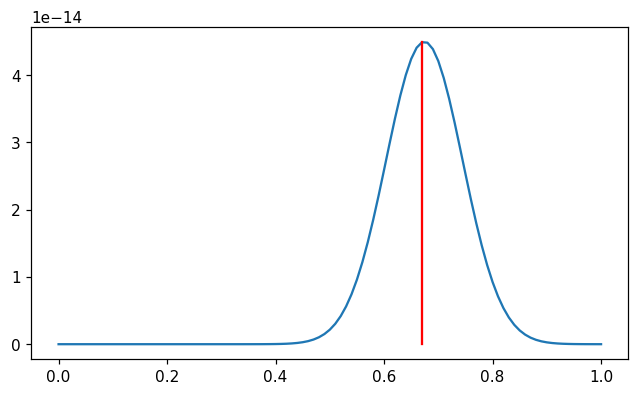

In [12]:
##CORRECT ANSWER##
# plot mu against p(D|mu) 
fig, ax = plt.subplots()
ax.plot(L[:, 0], L[:, 1]) 
# plot a vertical line to show arg max(P(D|mu))
xs = (L[max_ml_index, 0], L[max_ml_index, 0])
ys = (0, L[max_ml_index, 1])
ax.plot(xs, ys, color='r' )
##CORRECT ANSWER##

### Comparison with MLE recipe

Now implement the MLE recipe for $\mu_\text{ML}$ you solved at the beginning of this sheet to find the value of $\mu_{ML}$ (note that this should be just one line of code!).

Compare this value with that obtained previously. Do the values match? 

In [13]:
# write your code here

In [14]:
##CORRECT ANSWER##
print('mu_ml =', arg_max_ml)
print('mu_ml with MLE recipe (data mean) =', D.sum() / len(D))
##CORRECT ANSWER##

mu_ml = 0.67
mu_ml with MLE recipe (data mean) = 0.6742339399999999


### CORRECT ANSWER

By using the MLE recipe we found that the parameter $\mu$ maximising the likelihood was given by the mean of the data points $D$. 

In fact, the mean of $D$ corresponds to the previously obtained $\mu_{\text{ML}} = argmax_\mu P(D|\mu)$, which was $0.67$.

# 3. Posterior probability

Let's suppose now we have some prior knowledge regarding our parameter $\mu$. More precisely, our belief is that the probability density function (pdf) $p(\mu)$ modelling our parameter is also given by a normal distribution.

Assuming that $\mu \sim \mathcal{N}(0.5,0.01)$, write two functions, `compute_posterior(D, mu)` and `loop_posterior(D)`, to find $\mu_{\text{MAP}} = \arg \max_{\mu} p(D|\mu)p(\mu)$.

In [15]:
# write your code here

In [16]:
##CORRECT ANSWER##
def compute_posterior(data, mu):    
    likelihood = compute_likelihood(data, mu)
    prior = stats.norm.pdf(mu, loc=0.5, scale=0.1)
    posterior = likelihood * prior
    
    return posterior

def loop_posterior(data, size=101):
    posterior = np.zeros(shape=(size, 2))
    
    for i, mu in enumerate(np.linspace(0, 1, size)):
        p = compute_posterior(data, mu)
        posterior[i, :] = [mu, p]
        
    return posterior

POS = loop_posterior(D)
max_pos_index = POS[:, 1].argmax() # second column contains posterior
arg_max_posterior, max_posterior = POS[max_pos_index, :]

print('mu_map = {}\nmap = {}'.format(arg_max_posterior, max_posterior))
##CORRECT ANSWER##

mu_map = 0.62
map = 6.510559438694884e-14


### Visual interpretation


Now plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$ similar to the graph below.
![MLE](mle.png)

In [17]:
# write your code here

Text(0, 0.5, '$p(\\cdot)$')

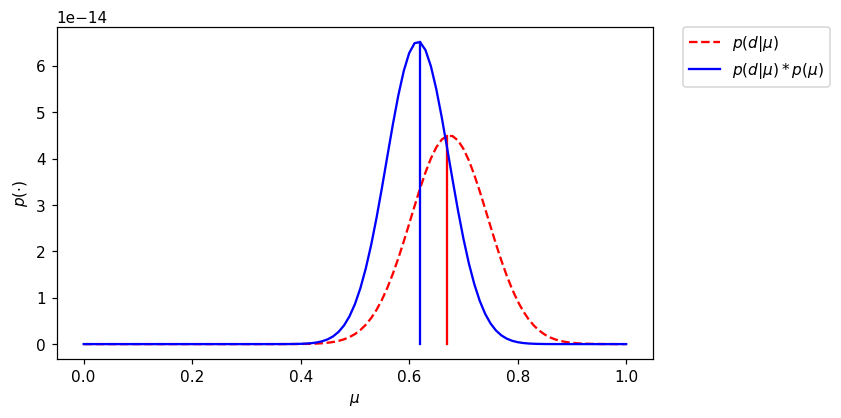

In [18]:
##CORRECT ANSWER##
plt.plot(L[:, 0], L[:, 1], color='r', linestyle='--', label='$p(d|\mu)$')
plt.plot( (L[max_ml_index, 0], L[max_ml_index, 0]), (0, L[max_ml_index, 1]), color='r')

plt.plot(POS[:, 0], POS[:, 1], color='b', linestyle='-', label='$p(d|\mu)*p(\mu)$')
plt.plot( (POS[max_pos_index, 0], POS[max_pos_index, 0]), (0, POS[max_pos_index, 1]), color='b')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$\mu$')
plt.ylabel('$p(\cdot)$')
##CORRECT ANSWER##

Repeat now the above calculations for `data2.dat` and `data3.dat`. 

For both files, plot $\mu$ against both $p(D|\mu)$ and $p(D|\mu)p(\mu)$.

In [19]:
# write your code here

[7.90000000e-01 3.14908142e-15]
The correct value for file `data2.dat` is:  0.79
[6.90000000e-01 7.69268972e-16]
The correct value for file `data2.dat` is  0.6900000000000001
[4.50000000e-01 9.85499147e-14]
The correct value for file `data3.dat` is:  0.45
[4.7000000e-01 3.6529579e-13]
The correct value for file `data3.dat` is  0.47000000000000003


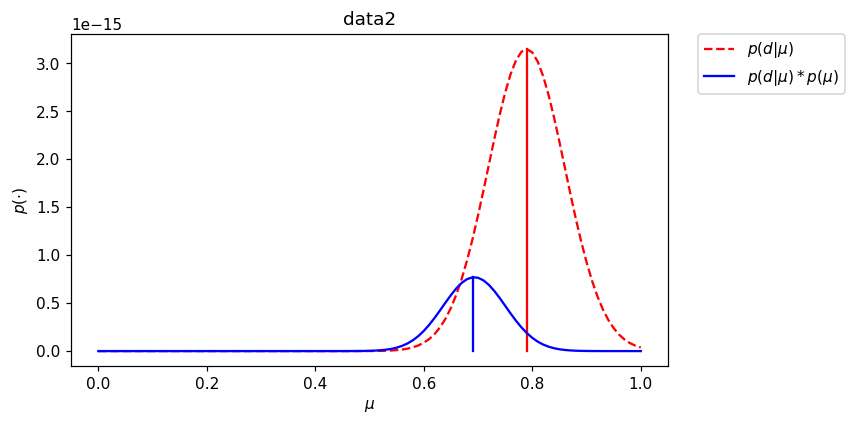

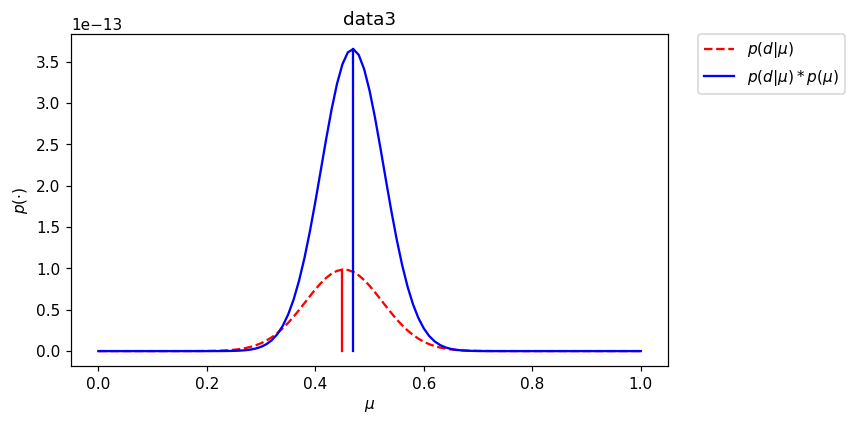

In [20]:
##CORRECT ANSWER##
def mle_vs_map(data_file):
    E = np.loadtxt(data_file, delimiter=',')
    lml_e = loop_likelihood(E)
    max_lml_e = lml_e[:, 1].argmax()

    print(lml_e[max_lml_e, :])
    print('The correct value for file `{}` is: '.format(data_file), lml_e[max_lml_e, 0])

    pos_e = loop_posterior(E)
    max_pos_e = pos_e[:, 1].argmax()

    print(pos_e[max_pos_e, :])
    print('The correct value for file `{}` is '.format(data_file), pos_e[max_pos_e, 0])

    fig_e, ax_e = plt.subplots()
    ax_e.plot(lml_e[:, 0], lml_e[:, 1], color='r', linestyle='--', label='$p(d|\mu)$')
    ax_e.plot((lml_e[max_lml_e, 0], lml_e[max_lml_e, 0]), (0, lml_e[max_lml_e, 1]), color='r')

    ax_e.plot(pos_e[:, 0], pos_e[:, 1], color='b', linestyle='-', label='$p(d|\mu)*p(\mu)$')
    ax_e.plot((pos_e[max_pos_e, 0], pos_e[max_pos_e, 0]), (0, pos_e[max_pos_e, 1]), color='b')

    ax_e.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ax_e.set_xlabel('$\mu$')
    ax_e.set_ylabel('$p(\cdot)$')
    ax_e.set_title(data_file[:-len('.txt')])
    return ax

mle_vs_map('data2.dat')
mle_vs_map('data3.dat')
##CORRECT ANSWER##

### Question

Observe the results obtained on `data2` and `data3`. What can we tell by looking at the figures you plotted above?

### CORRECT ANSWER

When the likelihood is further from the suggested prior, we are less confident about our measurements, and thus we observe a larger distance between the two distributions' mean.

## EXTRA 1

Until now, you assumed that our data was generated from a normal distribution with $\sigma^2 = 0.25$. 

Remove this assumption and estimate $\theta_{\text{MAP}} = [\mu_{\text{MAP}}, \sigma_{\text{MAP}}]$ experimentally by looping through different values of $\mu$ and $\sigma$. 

Assume the pdf $p(\sigma)$ is given by $\mathcal{N}(0.5, 0.16)$.

You may need to use `np.nanargmax` instead of `np.argmax`.

In [21]:
# write your code here

In [22]:
##CORRECT ANSWER##
def find_maximum_likelihood_with_prior(data, size=101):
    likelihood = np.zeros(shape=(size*size, 3))
    i = 0
    
    for mu in np.linspace(0, 1, size):
        for sigma in np.linspace(0, 1, size):
            likelihood[i, 0] = mu
            likelihood[i, 1] = sigma
            likelihood[i, 2] = stats.norm.pdf(D, loc=mu, scale=sigma).prod() *\
                stats.norm.pdf(mu, loc=0.5, scale=0.1) *\
                stats.norm.pdf(sigma, loc=0.5, scale=0.4)
            i += 1

    max_l = np.nanargmax(likelihood[:, 2])
    muML, sigmaML = likelihood[max_l, 0:2]
    return muML, sigmaML, likelihood

mu_ML, sigma_ML, likelihood_ML = find_maximum_likelihood_with_prior(D)
print('The correct values for file `data1.dat` is mu_ML = ', mu_ML, ' and sigma_ML = ', sigma_ML)
##CORRECT ANSWER##

/users/dm15712/miniconda2/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1662: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


The correct values for file `data1.dat` is mu_ML =  0.63  and sigma_ML =  0.44


## EXTRA 2

Plot ($\mu$, $\sigma$) against $p(D|\theta)p(\theta)$ similar to the mesh graph below (use the function `Axes3D.plot_surface`).
![MLE mesh](mle2.png)

In [23]:
# write your code here

/users/dm15712/miniconda2/lib/python3.7/site-packages/matplotlib/colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/users/dm15712/miniconda2/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


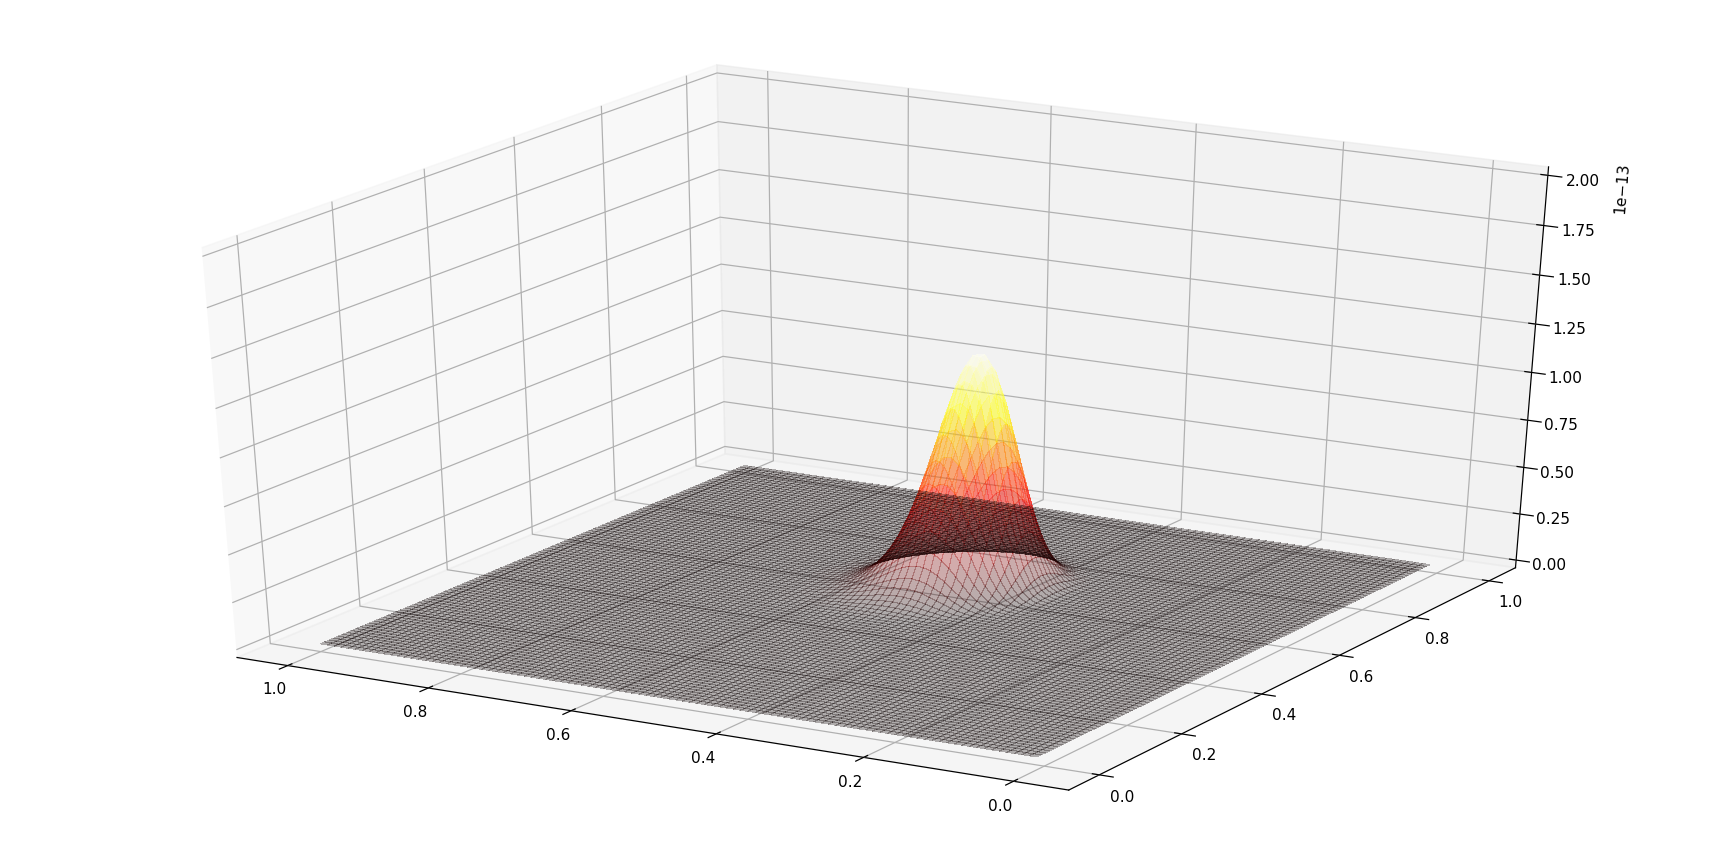

In [24]:
##CORRECT ANSWER##
size = 101
ls = np.linspace(0, 1, size)
mu_l, sigma_l = np.meshgrid(ls, ls)
p_l = np.reshape(likelihood_ML[:, 2], (size, size))

fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(20, 10))

ax.plot_surface(mu_l, sigma_l, p_l,\
                vmin=np.nanmin(p_l), vmax=np.nanmax(p_l),\
                rstride=1, cstride=1, cmap=plt.cm.hot, alpha=0.3, linewidth=0, antialiased=False)

ax.set_zlim(0, 2*10**-13)
ax.invert_xaxis()
##CORRECT ANSWER##